In [1]:
import re
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
%matplotlib inline

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
train = pd.read_csv('2017 WA Search Homework Data.csv', parse_dates = ['day'], date_parser=dateparse)

##### check null value

In [5]:
train.isnull().sum() # platform has 31219 null value. 

day                    0
platform           31219
device_category        0
medium                 0
business_market        0
sessions               0
dtype: int64

In [11]:
# check percentage of null value
train.platform.isnull().sum() * 1.0 / train.shape[0]

0.078758094911337548

In [12]:
# check if null value is randomly distributed across device_category, medium, business_market.
#train[train.platform.isnull()].day.value_counts()
#train[train.platform.isnull()].device_category.value_counts()
#train[train.platform.isnull()].medium.value_counts()
#train[train.platform.isnull()].business_market.value_counts()
#sum(train[train.platform.isnull()].sessions)

In [13]:
train.sessions.describe()

count    396391.000000
mean       1042.079903
std        2380.843402
min           0.000000
25%           5.000000
50%         133.000000
75%         965.000000
max       30663.000000
Name: sessions, dtype: float64

### feature engineer

In [14]:
train['weekday'] = train.day.apply(lambda x: x.weekday())
train['hour'] = train.day.apply(lambda x: x.hour)
train['day_day'] = train.day.apply(lambda x: x.day)
train['month'] = train.day.apply(lambda x: x.month)
train['week'] = train.day.apply(lambda x: x - timedelta(days=x.weekday()+1))

In [185]:
#train.to_csv('data_challenge_edited.csv', index=False)

## Exploratry Data Aanalysis

### What's traffic pattern by device category?

#### Mobile traffic increased by 6.79% YoY from 2016 to 2015; Desktop and tablet traffic continued dropped YoY

In [16]:
train.device_category.value_counts()

mobile     167509
tablet     144746
desktop     84136
Name: device_category, dtype: int64

In [17]:
train_device = train.groupby(['day','device_category']).sum().reset_index()

In [18]:
# double check if each device have data every day
train_device.device_category.value_counts()

mobile     756
desktop    756
tablet     756
Name: device_category, dtype: int64

In [19]:
sums = {}
for key in ['desktop','mobile','tablet']:
    sums[key] = train_device[train_device['device_category'] == key]

In [20]:
len(sorted(list(set([i.to_datetime() for i in train['day']]))))

/Users/april.liu/.virtualenvs/master/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2882: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  exec(code_obj, self.user_global_ns, self.user_ns)


756

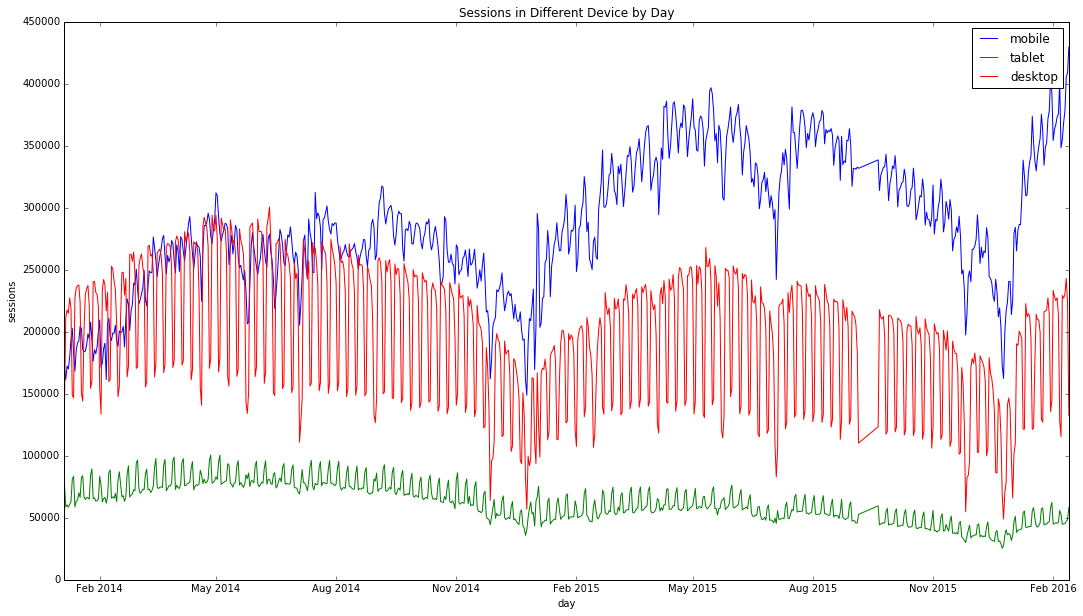

In [21]:
fig = plt.figure(1,figsize=[18,10])
plt.ylabel('sessions')
plt.xlabel('day')
plt.title('Sessions in Different Device by Day')
for key in sums:
    plt.plot(sorted(list(set([i.to_datetime() for i in train['day']]))),sums[key].sort_values(by='day')['sessions'],label = key )
    
plt.legend()
plt.show()

In [26]:
# check traffic pattern by device category by week

In [27]:
train_device_week = train.groupby(['week','device_category']).sum().reset_index()

In [28]:
sums = {}
for key in ['desktop','mobile','tablet']:
    sums[key] = train_device_week[train_device_week['device_category'] == key]

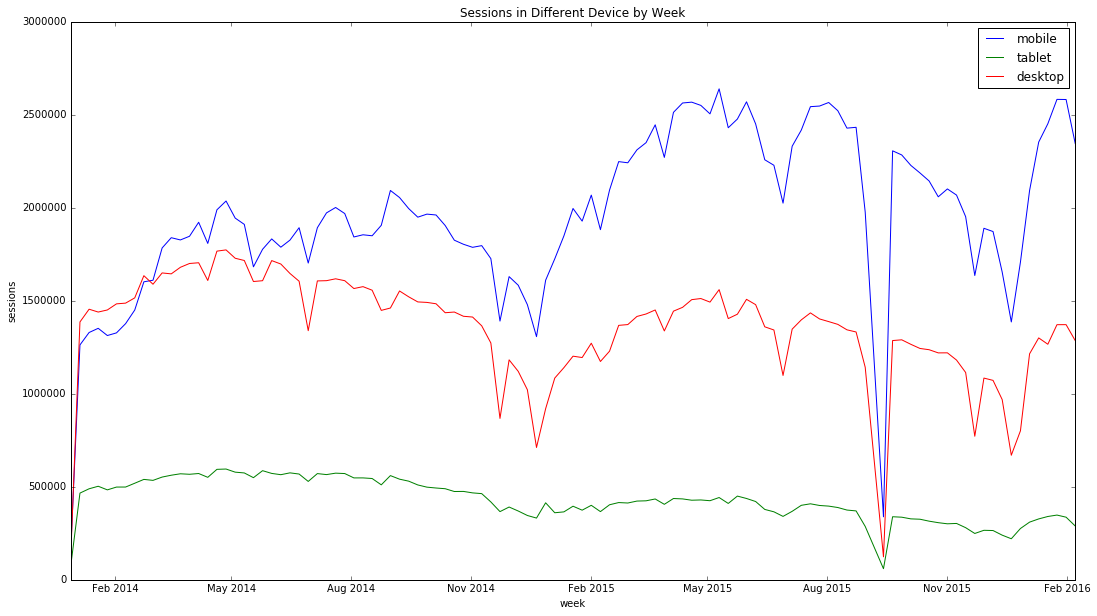

In [29]:
fig = plt.figure(1,figsize=[18,10])
plt.ylabel('sessions')
plt.xlabel('week')
plt.title('Sessions in Different Device by Week')
for key in sums:
    plt.plot(sorted(list(set([i.to_datetime() for i in train['week']]))),sums[key].sort_values(by='week')['sessions'],label = key )
    
plt.legend()
plt.show()

In [30]:
train_device_week[(train_device_week['week'] >= '2015-08-01') & (train_device_week['week'] <= '2015-11-01')]

,week,device_category,sessions,weekday,hour,day_day,month
249,2015-08-02,desktop,1388186,2206,0,4417,5896
250,2015-08-02,mobile,2566174,5068,0,10141,13528
251,2015-08-02,tablet,396169,4481,0,8921,11840
252,2015-08-09,desktop,1373298,2195,0,9545,5880
253,2015-08-09,mobile,2521953,5097,0,22117,13616
254,2015-08-09,tablet,388600,4430,0,19240,11848
255,2015-08-16,desktop,1343991,2176,0,14569,5832
256,2015-08-16,mobile,2428337,5136,0,34002,13584
257,2015-08-16,tablet,375008,4538,0,30106,12032
258,2015-08-23,desktop,1332351,2189,0,19757,5856


### What's the traffic pattern by platforms on mobile?

#### iOS app has the highest growth rate with 30% YoY, followed by Android app at 26% and mobile web with 10%. Mobile web has relatively slower growth rate.

In [31]:
df_plt_m = train[train.device_category == 'mobile']
df_plt_m.platform.value_counts()

Website        62347
Android app    53935
iOS app        40534
Name: platform, dtype: int64

In [32]:
df_plt_m = df_plt_m.groupby(['day','platform']).sum().reset_index()
sums = {}
for key in ['Website','Android app','iOS app']:
    sums[key] = df_plt_m[df_plt_m['platform'] == key]

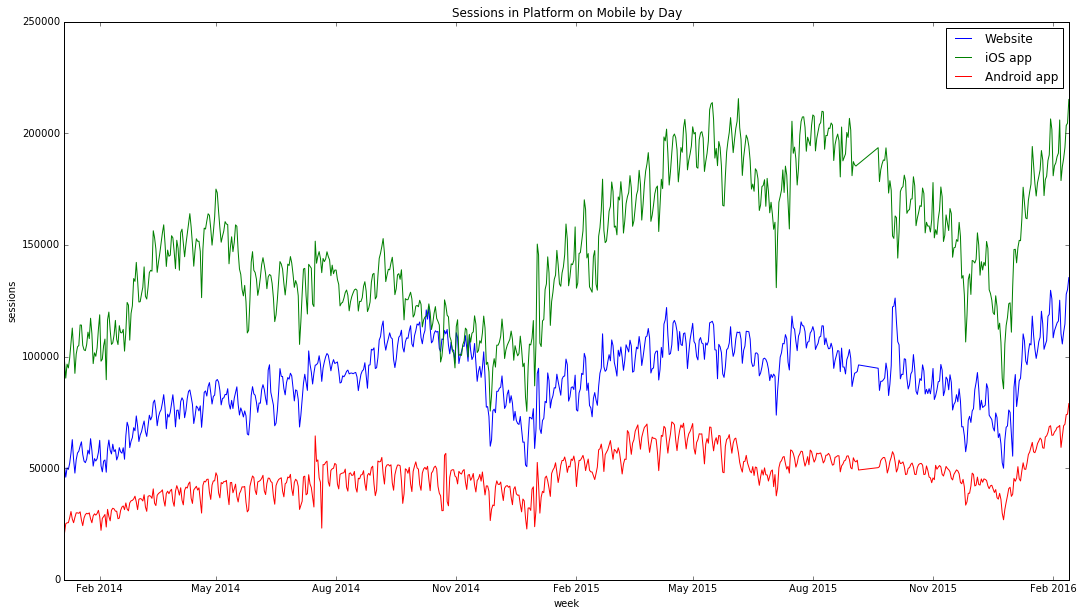

In [33]:
fig = plt.figure(1,figsize=[18,10])
plt.ylabel('sessions')
plt.xlabel('week')
plt.title('Sessions in Platform on Mobile by Day')
for key in sums:
    plt.plot(sorted(list(set([i.to_datetime() for i in train['day']]))),sums[key].sort_values(by='day')['sessions'],label = key )
    
plt.legend()
plt.show()

## How does traffic drive by medium?

#### Email, Organic and Direct drove about 85% of overall traffic; 

In [34]:
train_medium_week = train.groupby(['week','medium']).sum().reset_index()

In [35]:
train.medium.unique()

array(['email', 'referral', 'paid', 'direct', 'organic', 'other', 'push',
       'social'], dtype=object)

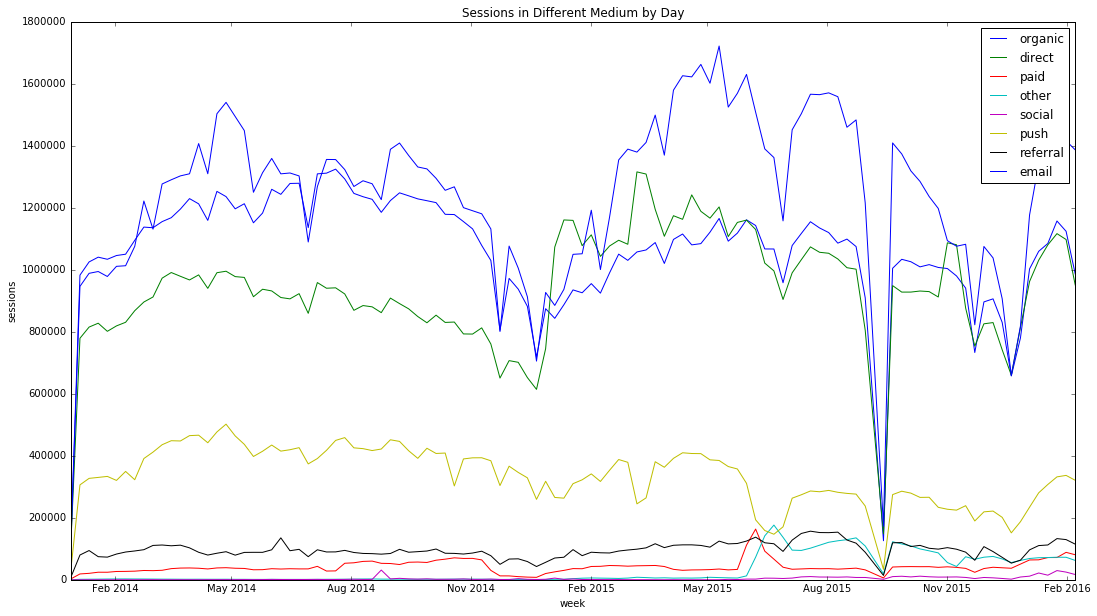

In [36]:
sums = {}
for key in train.medium.unique():
    sums[key] = train_medium_week[train_medium_week['medium'] == key]
    
fig = plt.figure(1,figsize=[18,10])
plt.ylabel('sessions')
plt.xlabel('week')
plt.title('Sessions in Different Medium by Week')
for key in sums:
    plt.plot(sorted(list(set([i.to_datetime() for i in train['week']]))),
             sums[key].sort_values(by='week')['sessions'],label = key
            )
    
plt.legend()
plt.show()

#### Web organic traffic dropped by 19% YoY

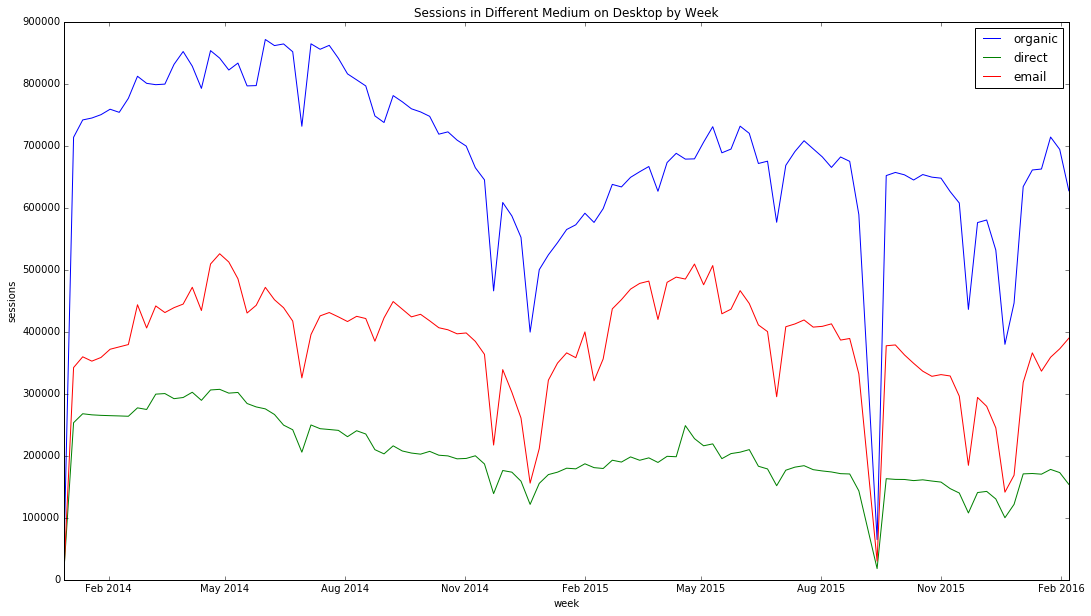

In [38]:
train_medium_week_d = train[train.device_category == 'desktop'].groupby(['week','medium']).sum().reset_index()
sums = {}

for key in ['direct','email','organic']:
    sums[key] = train_medium_week_d[train_medium_week_d['medium'] == key]
    

#fig, ax = plt.subplots()
#ax.set_color_cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])
fig = plt.figure(1,figsize=[18,10])
plt.ylabel('sessions')
plt.xlabel('week')
plt.title('Sessions in Different Medium on Desktop by Week')
plt.legend(loc='best')
for key in sums:
    plt.plot(sorted(list(set([i.to_datetime() for i in train_medium_week_d['week']]))),
             sums[key].sort_values(by='week')['sessions'],label = key
            )
    
plt.legend()
plt.show()

#### Email and direct traffic increased significantly on mobile, especially with IOS app. We noticed a drop in push notification with both Android app and IOS app. Since push notification still drove a significantly volume of traffic, we should start investigate.  We also need investigate organic traffic on desktop.  In March 15, 15, spike from direct medium from Androd app.

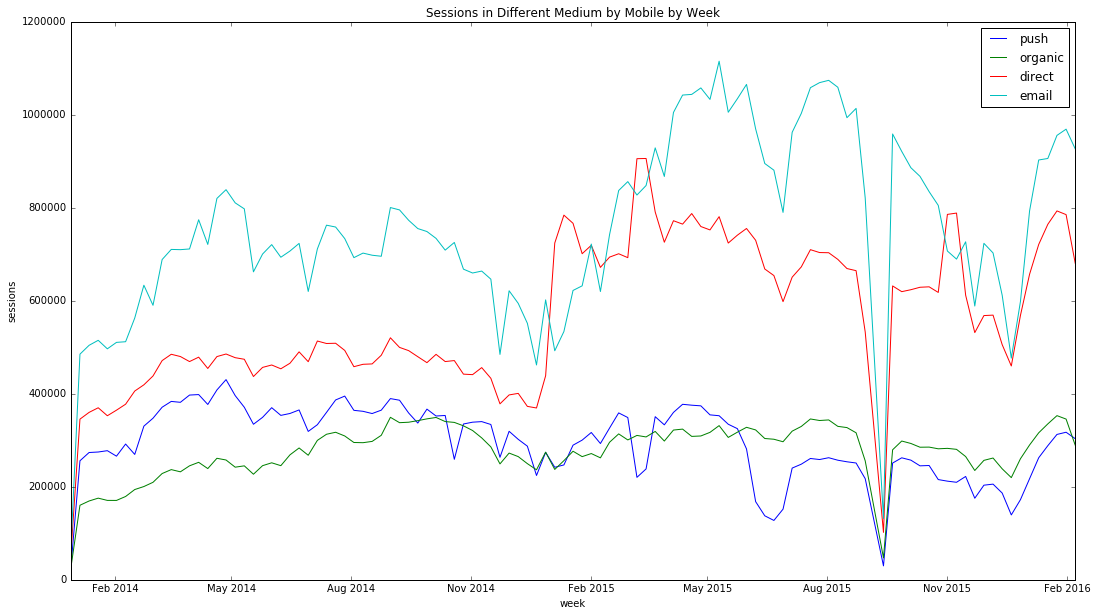

In [39]:
train_medium_week_d = train[train.device_category == 'mobile'].groupby(['week','medium']).sum().reset_index()
sums = {}

for key in ['organic','direct','email','push']:
    sums[key] = train_medium_week_d[train_medium_week_d['medium'] == key]
    

#fig, ax = plt.subplots()
#ax.set_color_cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b'])
fig = plt.figure(1,figsize=[18,10])
plt.ylabel('sessions')
plt.xlabel('week')
plt.title('Sessions in Different Medium on Mobile by Week')
plt.legend(loc='best')
for key in sums:
    plt.plot(sorted(list(set([i.to_datetime() for i in train_medium_week_d['week']]))),
             sums[key].sort_values(by='week')['sessions'],label = key,
            )
    
plt.legend()
plt.show()

## Traffic pattern by business market

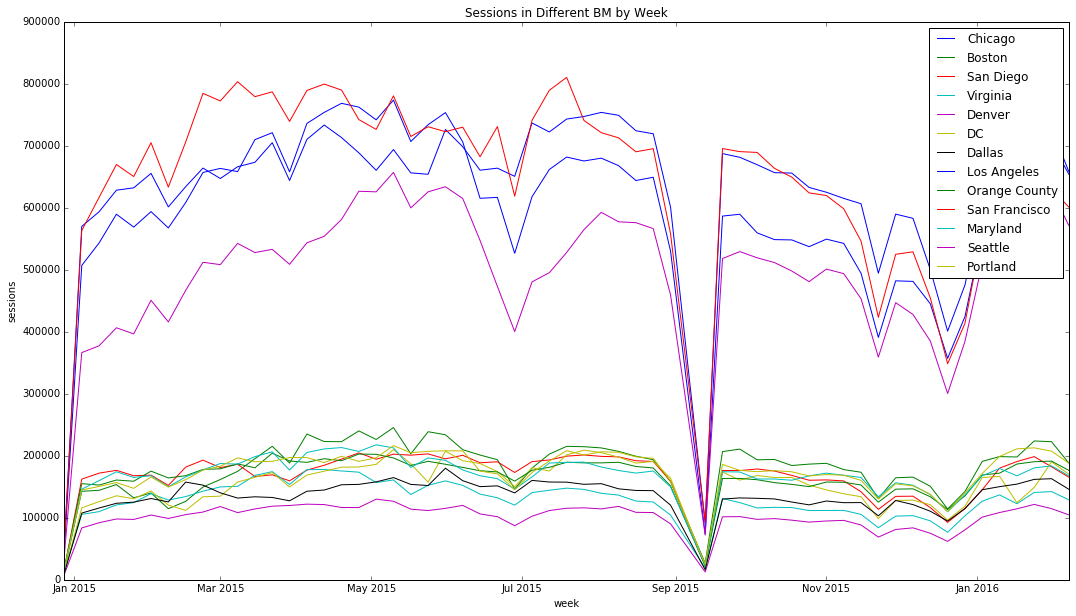

In [40]:
train_bm_week = train[train.day >= '2015-01-04'].groupby(['week','business_market']).sum().reset_index()
sums = {}
for key in train.business_market.unique():
    sums[key] = train_bm_week[train_bm_week['business_market'] == key]
    
fig = plt.figure(1,figsize=[18,10])
plt.ylabel('sessions')
plt.xlabel('week')
plt.title('Sessions in Different BM by Week')
for key in sums:
    plt.plot(sorted(list(set([i.to_datetime() for i in train[train.day>='2015-01-04']['week']]))),
             sums[key].sort_values(by='week')['sessions'],label = key
            )
    
plt.legend()
plt.show()

## Is traffic going to be influenced by day of week?

#### Saturday and Sunday have lower desktop web traffic than weekdays; 

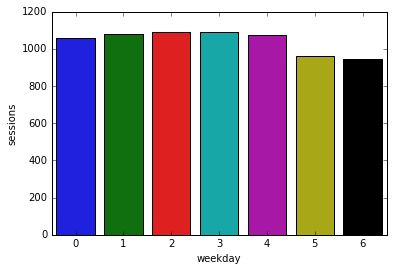

In [42]:
train_weekday = train.groupby('weekday').mean()['sessions'].reset_index()
sns.barplot(x=train_weekday['weekday'], y = train_weekday.sessions, data = train_weekday)

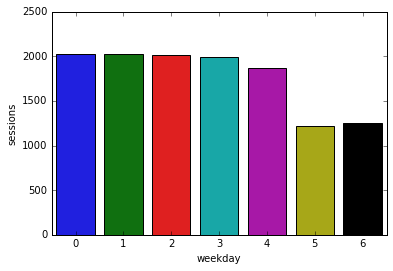

In [43]:
train_weekday = train[train.device_category == 'desktop'].groupby('weekday').mean()['sessions'].reset_index()
sns.barplot(x=train_weekday['weekday'], y = train_weekday.sessions, data = train_weekday)

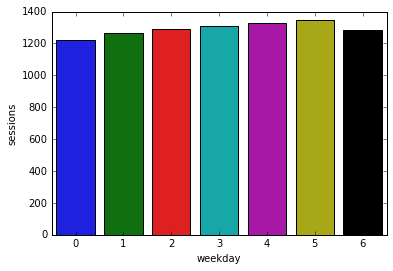

In [44]:
train_weekday = train[train.device_category == 'mobile'].groupby('weekday').mean()['sessions'].reset_index()
sns.barplot(x=train_weekday['weekday'], y = train_weekday.sessions, data = train_weekday)

## Is traffic going to be influenced by day of week?

In [45]:
train_month = train.groupby('month').median()['sessions'].reset_index()

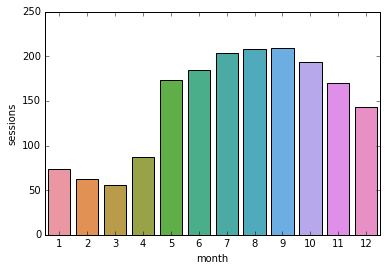

In [46]:
sns.barplot(x=train_month['month'], y = train_month.sessions, data = train_month)

## Periodic Structure and FFTs

In [47]:
train_bm_day = train.groupby(['day','business_market']).sum().reset_index()
sums = {}
for key in train.business_market.unique():
    sums[key] = train_bm_day[train_bm_day['business_market'] == key]
    

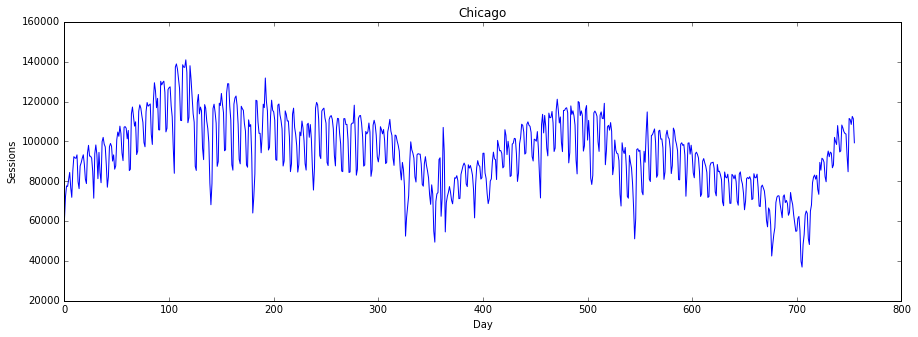

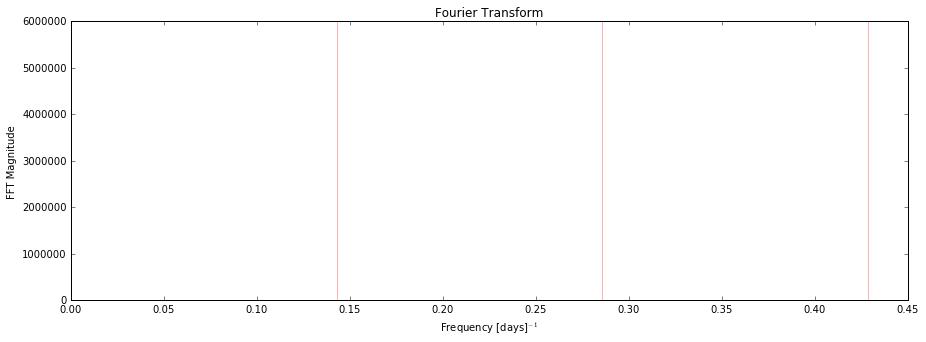

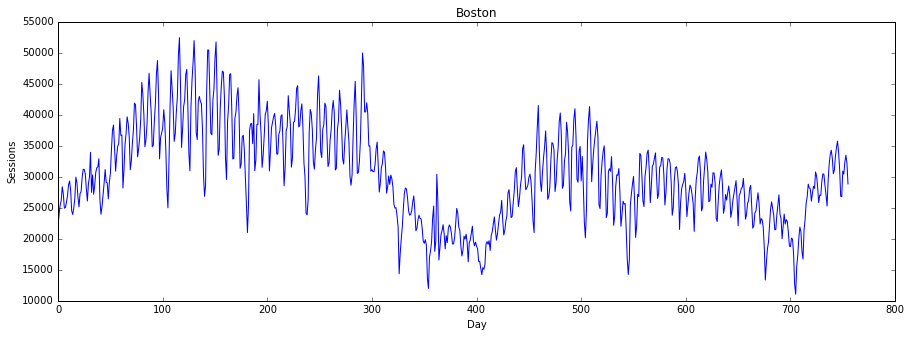

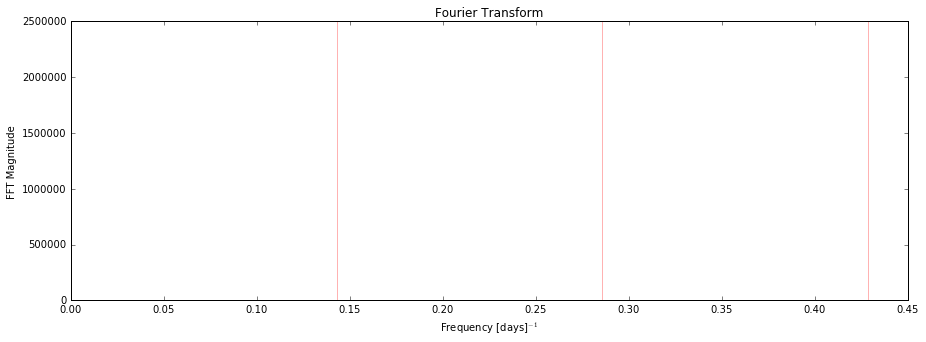

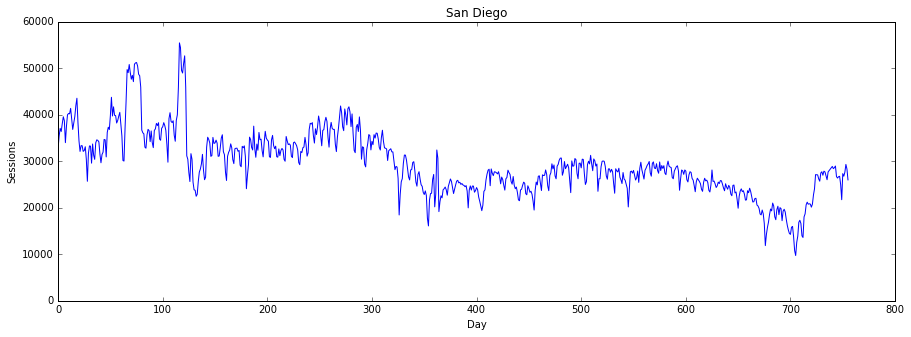

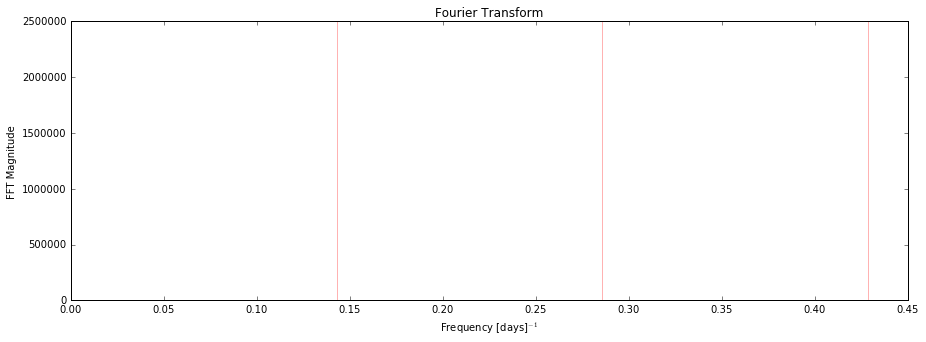

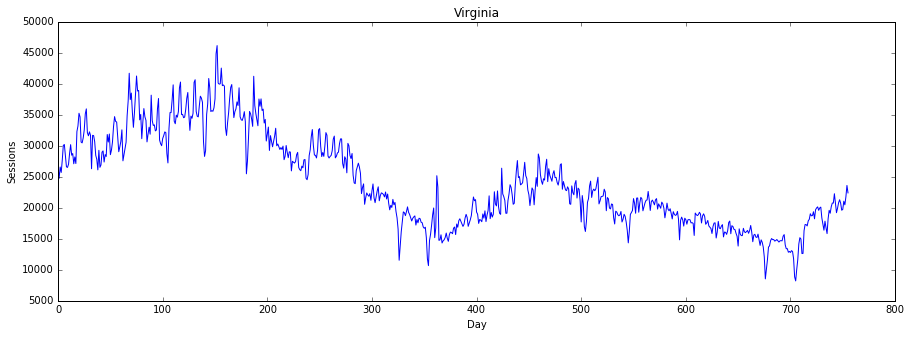

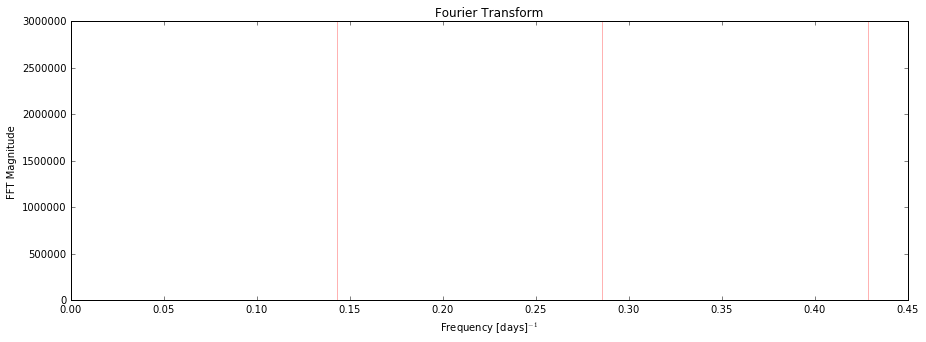

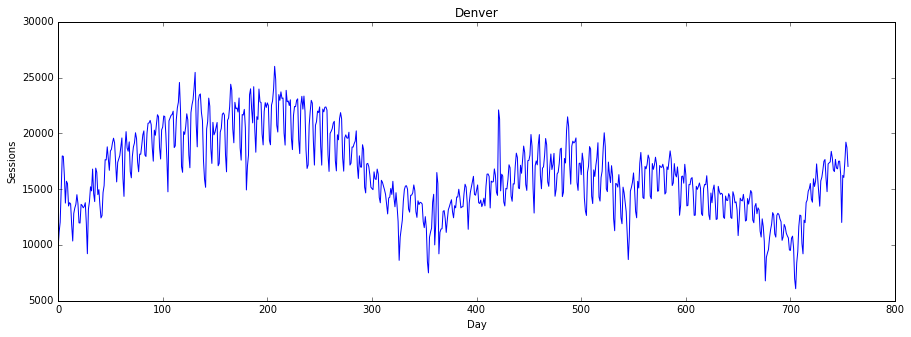

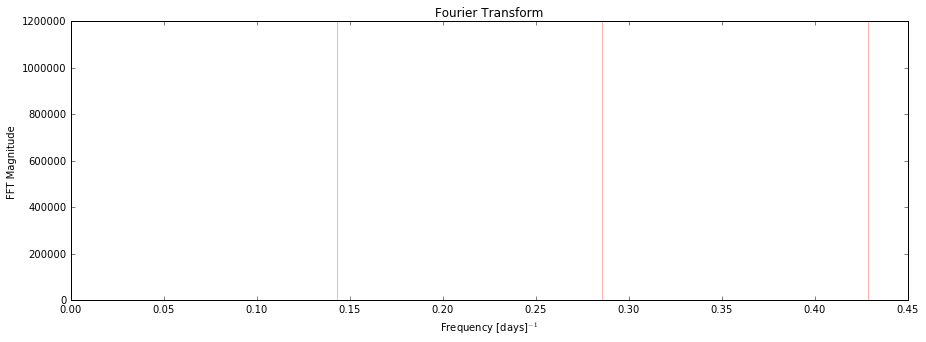

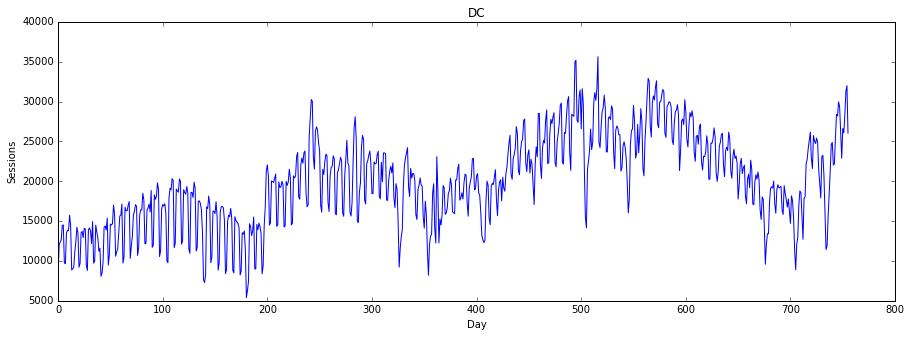

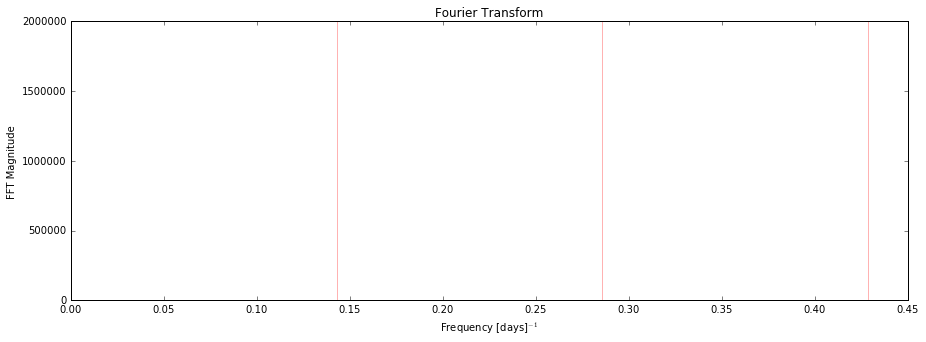

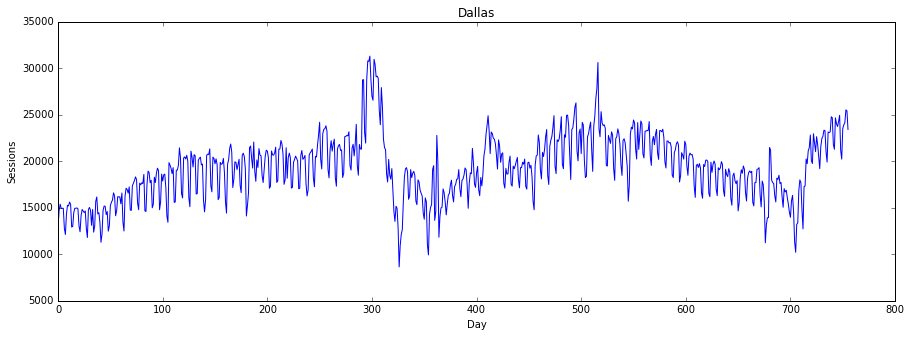

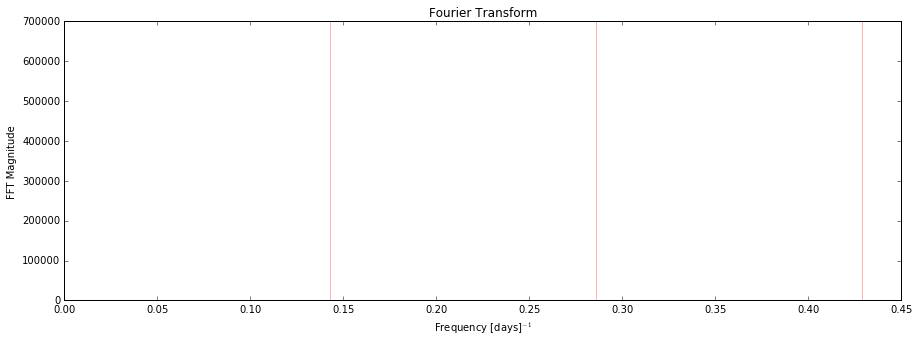

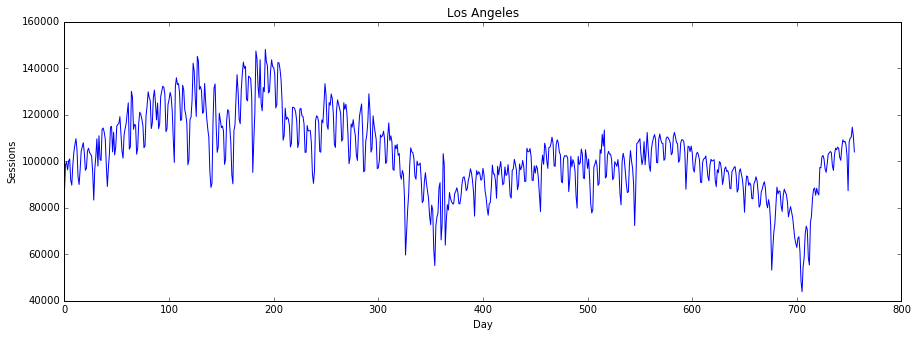

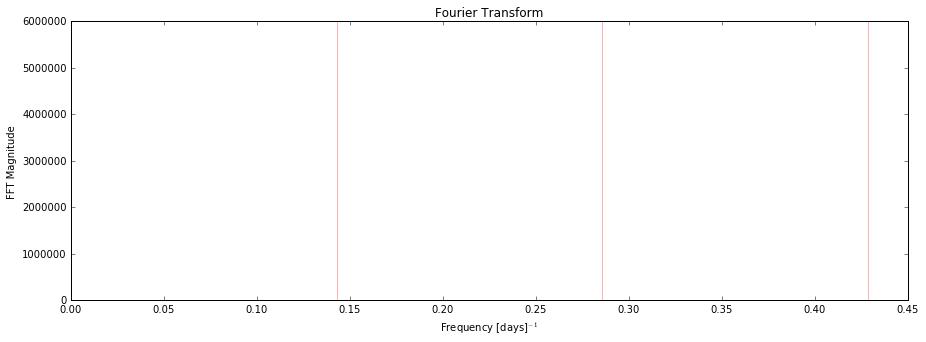

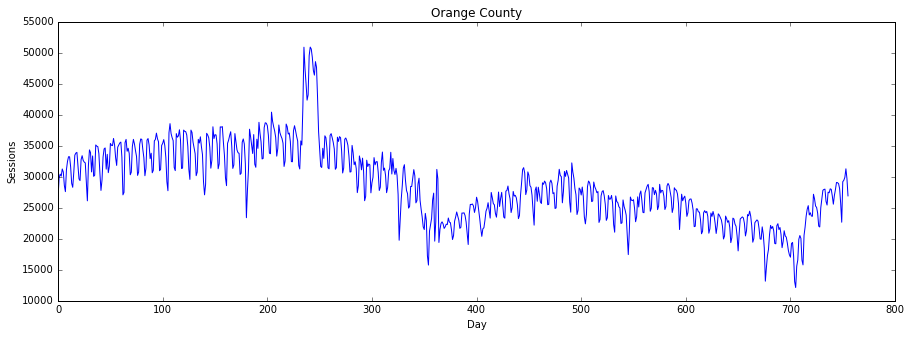

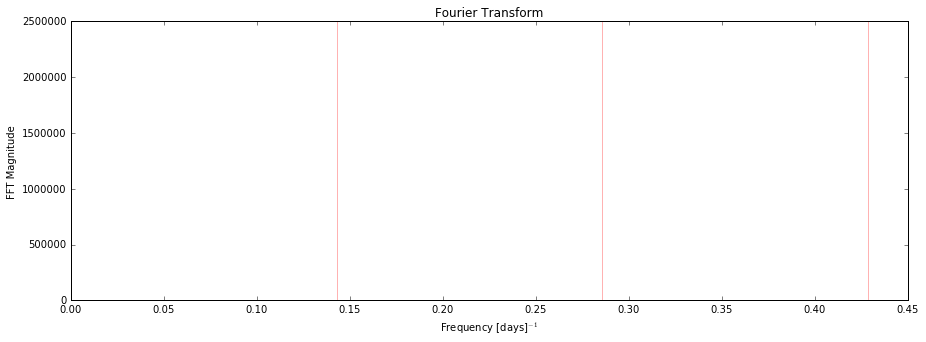

ValueError: x and y must have same first dimension

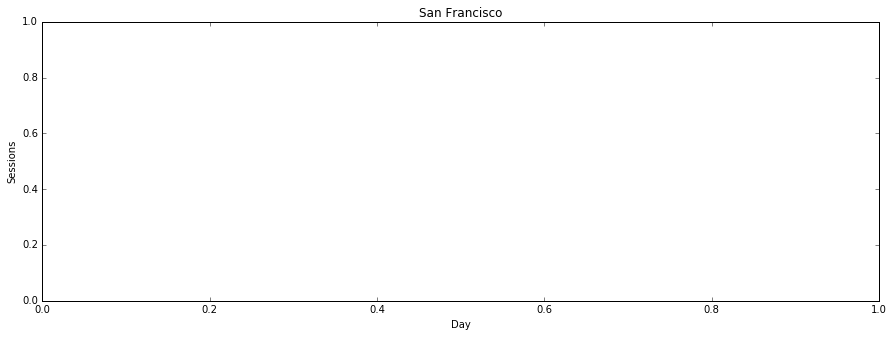

In [48]:
days = [r for r in range(sums['Chicago'].shape[0])]
from scipy.fftpack import fft
def plot_with_fft(key):

    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Sessions')
    plt.xlabel('Day')
    plt.title(key)
    plt.plot(days,
             sums[key].sort_values(by='day')['sessions'],label = key
            )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(sums[key]['sessions'])
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:],label = key )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

for key in sums:
    plot_with_fft(key)

## More Analysis

/Users/april.liu/.virtualenvs/master/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


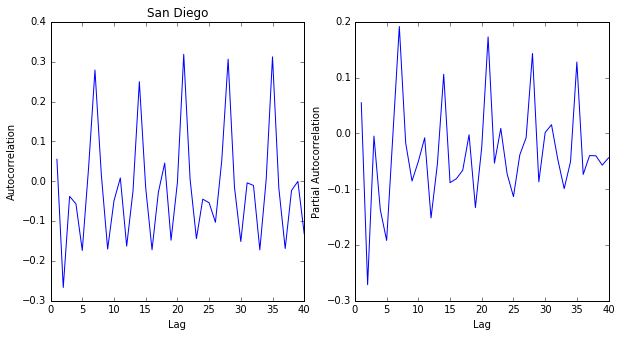

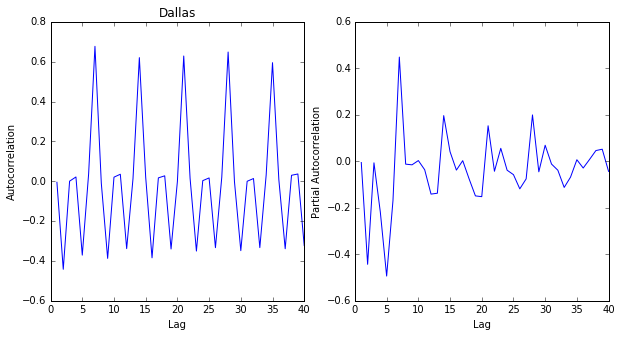

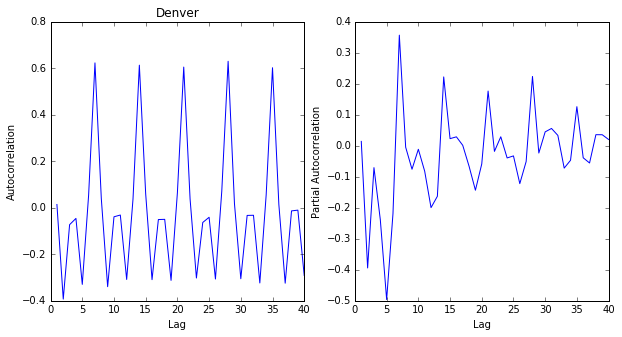

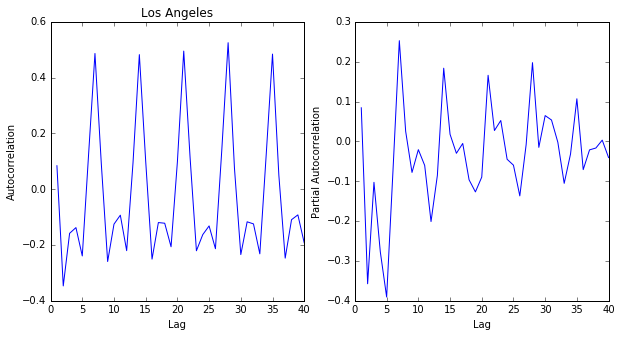

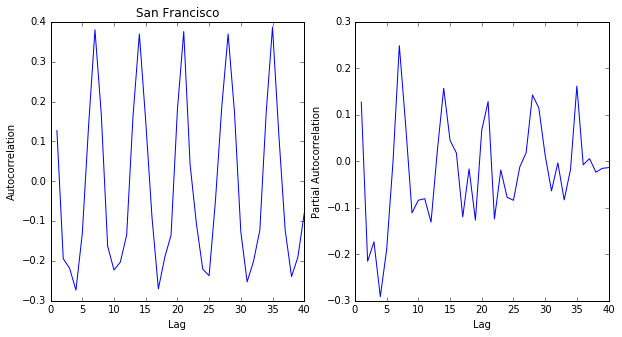

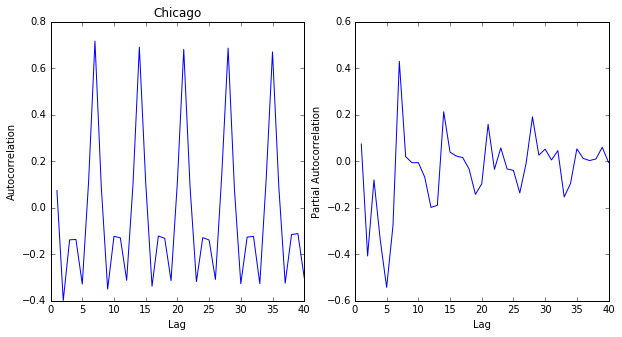

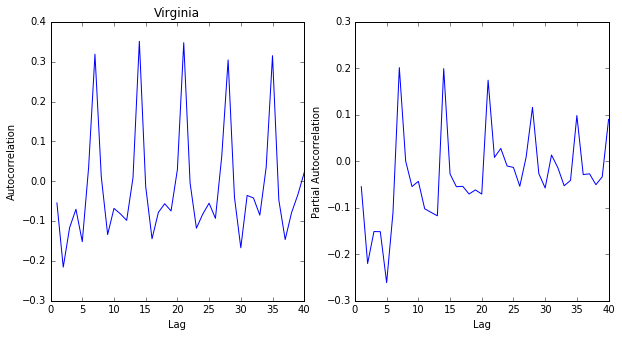

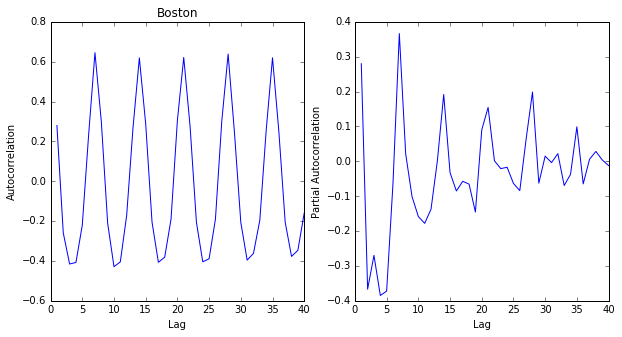

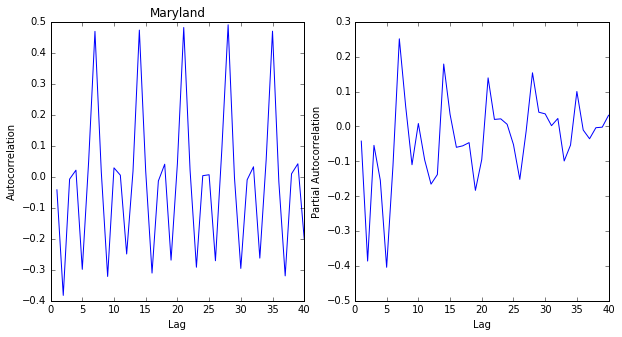

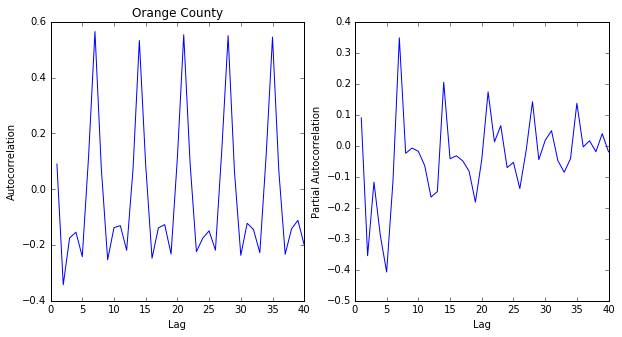

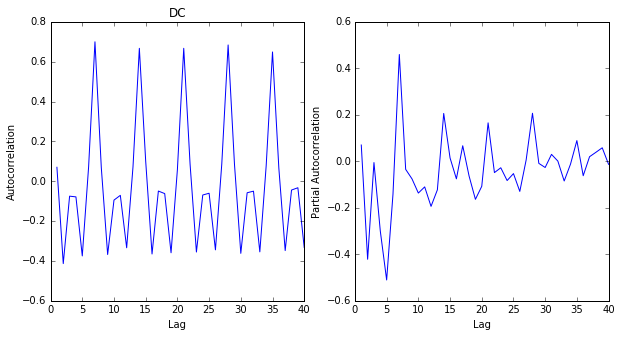

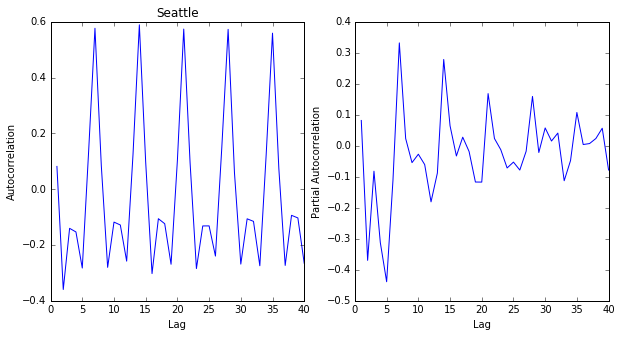

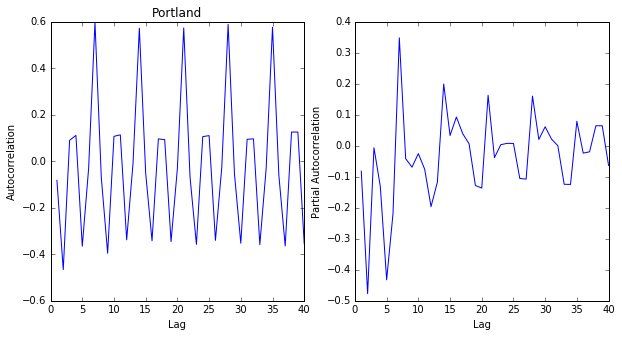

In [67]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

for key in train.business_market.unique():
    fig = plt.figure(1,figsize=[10,5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    cols = train.columns[1:-1]
    data = np.array(sums[key]['sessions'])
    data_diff = [data[i] - data[i-1] for i in range(1,len(data))]
    autocorr = acf(data_diff)
    pac = pacf(data_diff)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])

    ax2.plot(x[1:],pac[1:])
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.set_title(key)

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    plt.show()

## Model Building - Prophet

In [49]:
import fbprophet
from fbprophet import Prophet
import numpy as np
import pandas as pd

#### forecast daily overall traffic for the rest of 2016 

In [52]:
# create holiday dataframe
holidays = pd.read_csv('us_holiday.csv',parse_dates = ['date'])
holidays.rename(columns={'date':'ds'}, inplace=True)

In [66]:
train_day = train.groupby('day').sum().reset_index()
train_day['sessions_log'] = train_day.sessions.apply(lambda x: np.log1p(x))

In [67]:
train_day.rename(columns={'day':'ds','sessions_log':'y','sessions':'y_orig'}, inplace=True)

In [68]:
model = Prophet(holidays=holidays, daily_seasonality=True) #instantiate Prophet
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(train_day[['ds','y','y_orig']]); #fit the model with your dataframe

In [69]:
future_data = model.make_future_dataframe(periods=365)

In [70]:
forecast_data = model.predict(future_data)

In [71]:
forecast_data.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1116,2017-02-08,13.905124,13.272190,14.513884,13.488272,14.740091,0.0,0.0,0.0,0.0,...,0.219177,0.219177,0.219177,0.036024,0.036024,0.036024,-0.157024,-0.157024,-0.157024,14.124301
1117,2017-02-09,13.907134,13.270764,14.519517,13.512788,14.782502,0.0,0.0,0.0,0.0,...,0.245385,0.245385,0.245385,0.049695,0.049695,0.049695,-0.151934,-0.151934,-0.151934,14.152519
1118,2017-02-10,13.909145,13.270908,14.525333,13.515233,14.754690,0.0,0.0,0.0,0.0,...,0.236482,0.236482,0.236482,0.030179,0.030179,0.030179,-0.145795,-0.145795,-0.145795,14.145626
1119,2017-02-11,13.911155,13.268884,14.530756,13.411778,14.651129,0.0,0.0,0.0,0.0,...,0.125135,0.125135,0.125135,-0.086868,-0.086868,-0.086868,-0.138680,-0.138680,-0.138680,14.036290
1120,2017-02-12,13.913165,13.270642,14.534324,13.392472,14.660772,0.0,0.0,0.0,0.0,...,0.113502,0.113502,0.113502,-0.099673,-0.099673,-0.099673,-0.130679,-0.130679,-0.130679,14.026668


In [72]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1116,2017-02-08,14.124301,13.488272,14.740091
1117,2017-02-09,14.152519,13.512788,14.782502
1118,2017-02-10,14.145626,13.515233,14.754690
1119,2017-02-11,14.036290,13.411778,14.651129
1120,2017-02-12,14.026668,13.392472,14.660772


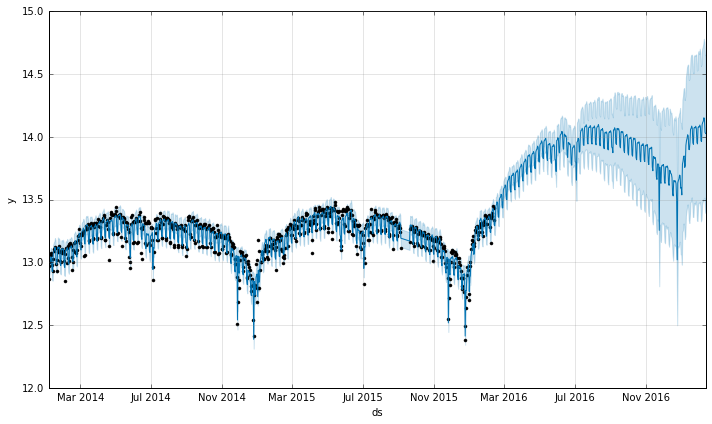

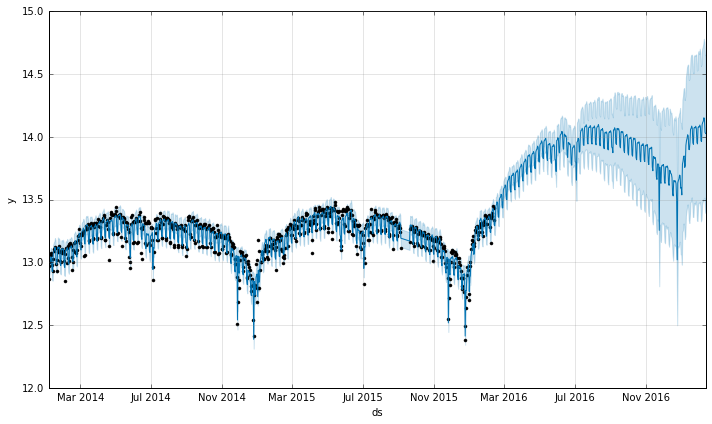

In [73]:
model.plot(forecast_data)

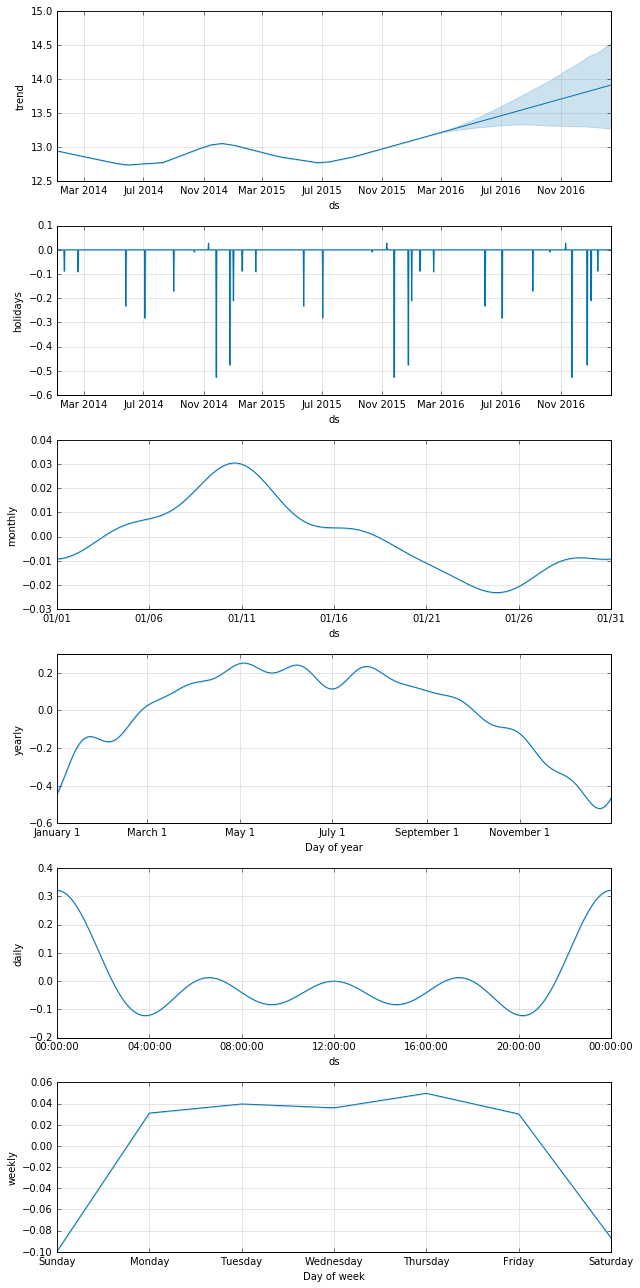

In [74]:
model.plot_components(forecast_data);

#### Forecast daily sessions by business_market

In [81]:
train_bm_day = train.groupby(['day','business_market']).sum().reset_index()
train_bm_day['sessions_log'] = train_bm_day.sessions.apply(lambda x: np.log1p(x))
train_bm_day.rename(columns={'day':'ds','sessions_log':'y','sessions':'y_orig'}, inplace=True)

In [89]:
def prophet_forecast(bm):
    m = Prophet(daily_seasonality=True,
                holidays=holidays,yearly_seasonality = True)
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    m.fit(train_bm_day[(train_bm_day.business_market == bm)&((train_bm_day.ds <= '2016-01-10'))][['ds','y','y_orig']])
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    
    fig = plt.figure(1,figsize=[15,5])
    plt.title(bm)
    plt.plot(sorted(list(set([i.to_datetime() for i in train_bm_day['ds']]))),
             train_bm_day[train_bm_day.business_market == bm]['y'])

    plt.plot(sorted(list(set([i.to_datetime() for i in forecast['ds']]))),
             forecast['yhat'])
    
    model.plot_components(forecast);
    
    #model.plot(forecast_data)
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [121]:
# test

/Users/april.liu/.virtualenvs/master/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  """Entry point for launching an IPython kernel.


,ds,yhat,yhat_lower,yhat_upper
0,2014-01-05,9.999844,9.879331,10.121780
1,2014-01-06,10.142710,10.022634,10.271584
2,2014-01-07,10.200346,10.076886,10.324820
3,2014-01-08,10.266809,10.139773,10.392623
4,2014-01-09,10.291833,10.171327,10.419406
5,2014-01-10,10.229533,10.107946,10.363592
6,2014-01-11,10.080514,9.962481,10.203648
7,2014-01-12,10.114224,9.996320,10.238246
8,2014-01-13,10.247983,10.124505,10.367761
9,2014-01-14,10.292254,10.168172,10.414927


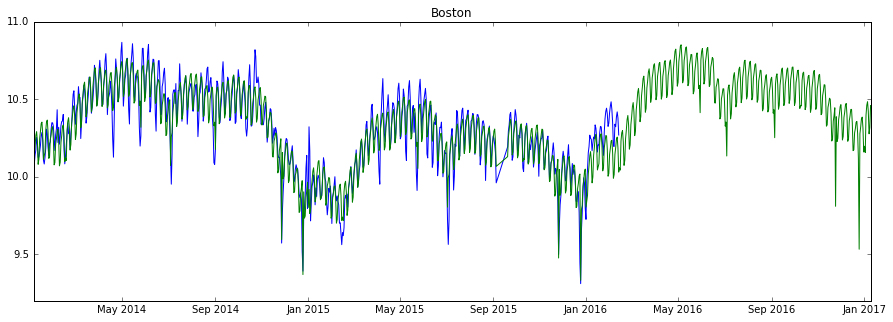

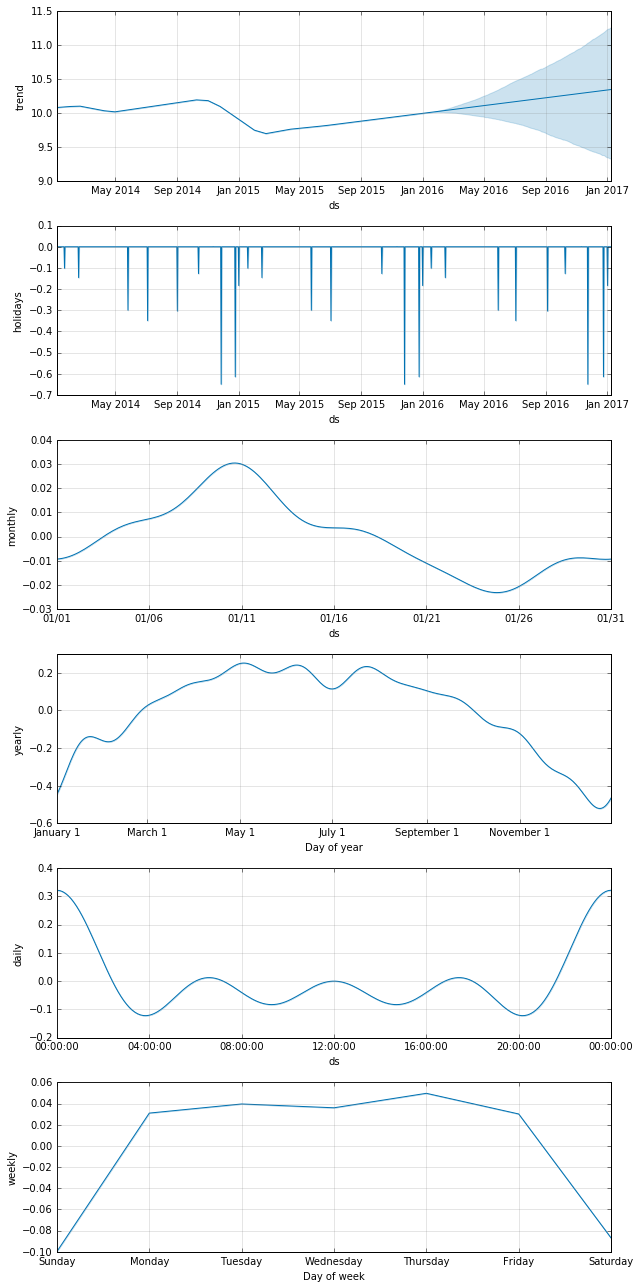

In [90]:
prophet_forecast('Boston')

/Users/april.liu/.virtualenvs/master/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  """Entry point for launching an IPython kernel.


,ds,yhat,yhat_lower,yhat_upper
0,2014-01-05,11.325006,11.251012,11.398620
1,2014-01-06,11.465693,11.386485,11.543285
2,2014-01-07,11.497043,11.417329,11.567545
3,2014-01-08,11.511079,11.428547,11.589097
4,2014-01-09,11.526075,11.445347,11.598425
5,2014-01-10,11.502154,11.422536,11.578593
6,2014-01-11,11.414271,11.334063,11.490090
7,2014-01-12,11.415481,11.341319,11.493952
8,2014-01-13,11.540494,11.459502,11.621567
9,2014-01-14,11.558870,11.482658,11.641312


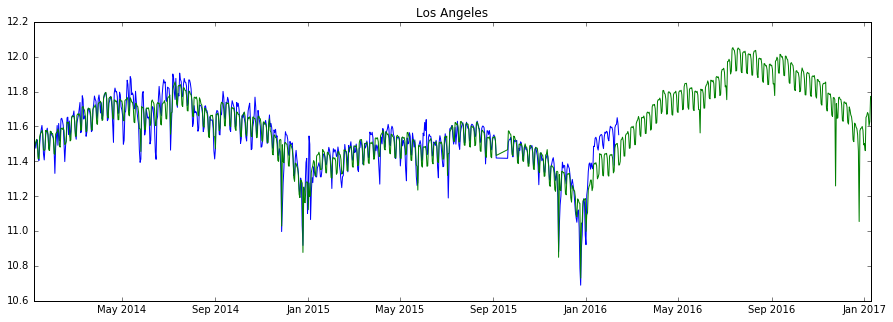

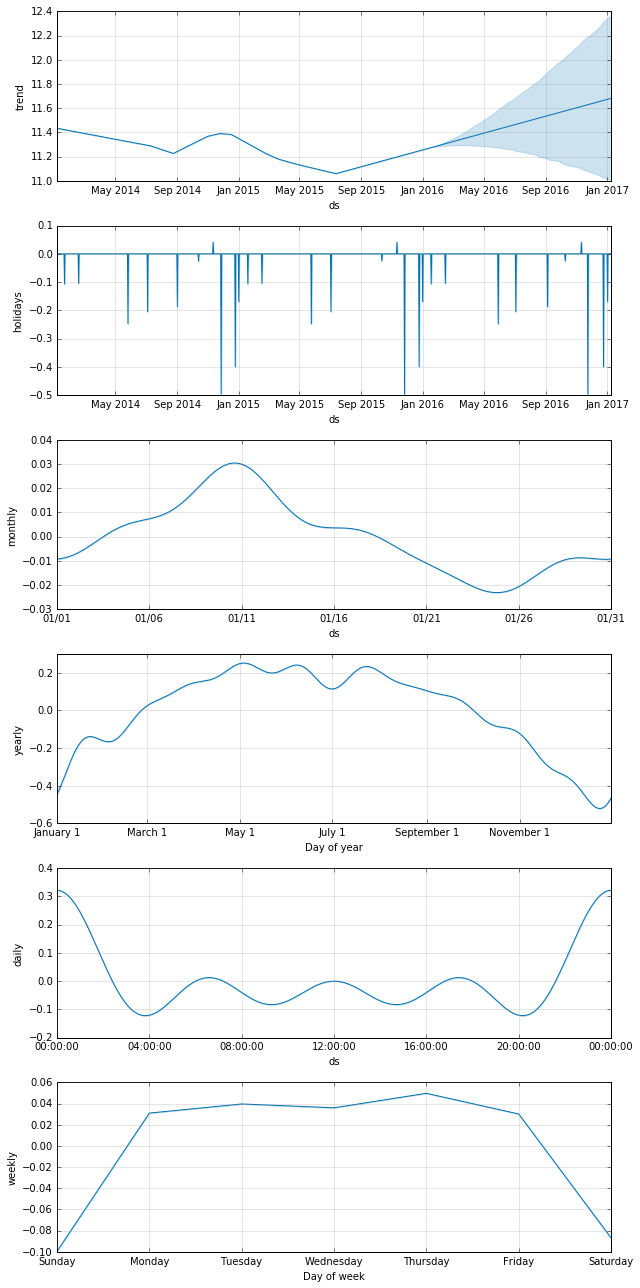

In [91]:
prophet_forecast('Los Angeles')

In [122]:
def prophet_adjust(bm):
    f = prophet_forecast(bm)
    f['forecast_sessions'] = f.yhat.apply(lambda x: np.math.exp(x)-1)
    f['forecast_sessions_lower'] = f.yhat_lower.apply(lambda x: np.math.exp(x)-1)
    f['forecast_sessions_upper'] = f.yhat_upper.apply(lambda x: np.math.exp(x) - 1)
    orig_t = train_bm_day[train_bm_day.business_market == bm]
    com = pd.merge(f, orig_t, how = 'left', on = 'ds')
    return com
    

/Users/april.liu/.virtualenvs/master/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  


,ds,yhat,yhat_lower,yhat_upper,forecast_sessions,forecast_sessions_lower,forecast_sessions_upper,business_market,y_orig,weekday,hour,day_day,month,y
0,2014-01-05,11.325006,11.244774,11.401381,82867.104822,76478.177352,89444.152704,Los Angeles,86773.0,204.0,0.0,170.0,34.0,11.371062
1,2014-01-06,11.465693,11.387114,11.549094,95385.561248,88177.095724,103682.097507,Los Angeles,98495.0,0.0,0.0,204.0,34.0,11.497771
2,2014-01-07,11.497043,11.419213,11.574331,98423.254806,91053.497590,106331.966046,Los Angeles,99703.0,33.0,0.0,231.0,33.0,11.509961
3,2014-01-08,11.511079,11.430515,11.584889,99814.507563,92088.382301,107460.633192,Los Angeles,96293.0,66.0,0.0,264.0,33.0,11.475161
4,2014-01-09,11.526075,11.447748,11.608023,101322.679075,93689.123761,109975.623061,Los Angeles,100162.0,105.0,0.0,315.0,35.0,11.514554
5,2014-01-10,11.502154,11.423400,11.584878,98927.655815,91435.483300,107459.451881,Los Angeles,101019.0,136.0,0.0,340.0,34.0,11.523074
6,2014-01-11,11.414271,11.339721,11.502269,90604.588277,84095.547102,98938.993499,Los Angeles,91867.0,175.0,0.0,385.0,35.0,11.428108
7,2014-01-12,11.415481,11.339350,11.491411,90714.264439,84064.362845,97870.543669,Los Angeles,89742.0,204.0,0.0,408.0,34.0,11.404705
8,2014-01-13,11.540494,11.459365,11.622240,102794.170066,94783.839142,111550.322263,Los Angeles,98375.0,0.0,0.0,442.0,34.0,11.496552
9,2014-01-14,11.558870,11.480936,11.633305,104700.646706,96850.646622,112791.461028,Los Angeles,103946.0,33.0,0.0,462.0,33.0,11.551636


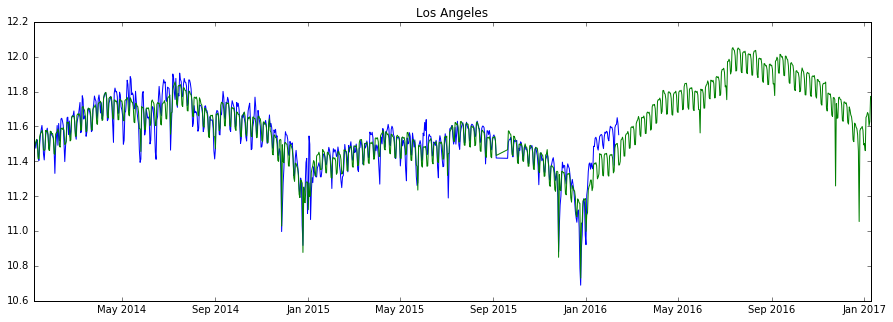

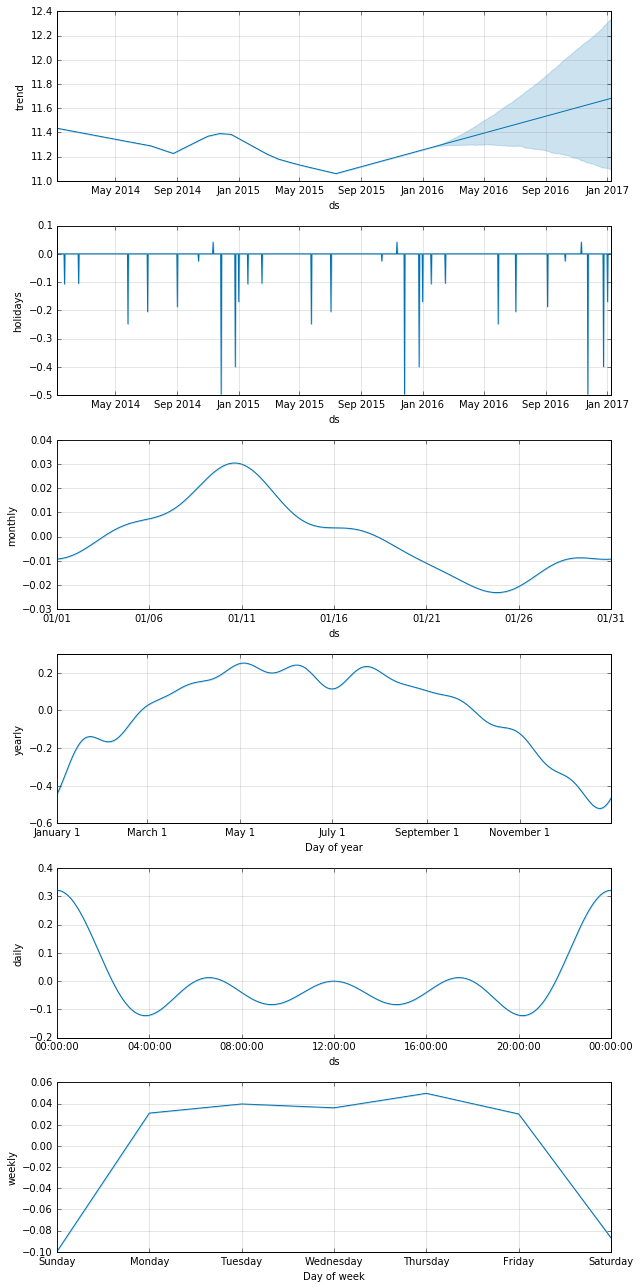

In [123]:
prophet_adjust('Los Angeles')